# Project 5 Part 3 - Classification Model

Continued from Part 2: 


In [28]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
%matplotlib inline

In [29]:
# Load data from Part 1
norms_df = pd.read_csv('norms.csv',usecols=[1,2,3])
good_df = pd.read_csv('good_loans.csv',usecols=[1,2,3,4,5,6,7,8])
bad_df = pd.read_csv('bad_loans.csv',usecols=[1,2,3,4,5,6,7,8])

In [30]:
# Load data from Part 2
# return to original data type
samples = np.array(pd.read_csv('MC_samples.csv',\
                               usecols=[1,2,3,4,5,6,7,8]).values.tolist())


\begin{equation}
Probablity\  of\  Good\  Loan = E[p] 
= E[\sigma(g(x)]
= E[\sigma(\omega_0 + \omega_1loan\_amt + \omega_2income + \omega_3dti+ \omega_4int\_rate\_p + \omega_5 OWN + \omega_6 MORTGAGE+ \omega_7 RENT + \omega_860month +\omega_936month)
= \frac{1}{N}\sum p(w)
\end{equation}


In [31]:
items = 2000
# ensures balanced number of good and bad loans in data sample
customers = bad_df.sample(n=items).values.tolist() + good_df.sample(n=items).values.tolist()

In [32]:
sigmoid = lambda g: 1./(1+np.exp(-g))

def predictive(w,app):  # w is MCMC samples, data is applicant being evaluated
    g = w[0] + w[1]*app[1] + w[2]*app[2] + w[3]*app[3] + w[4]*app[4]\
        + w[5]*app[5] + w[6]*app[6] + w[7]*app[7]
    return sigmoid(g)

def E(f,MCMC_samples,applicant):
    N = len(MCMC_samples)
    return np.sum([f(s,applicant) for s in MCMC_samples])*1./N


g = []
b = []

for i in customers:
    cust = i
    if cust[0] == 1:
        g.append(E(predictive,samples,cust))
    else:
        b.append(E(predictive,samples,cust))
    

In [33]:
np.median(g)

0.57033482791057666

In [34]:
np.median(b)

0.44571737095457897

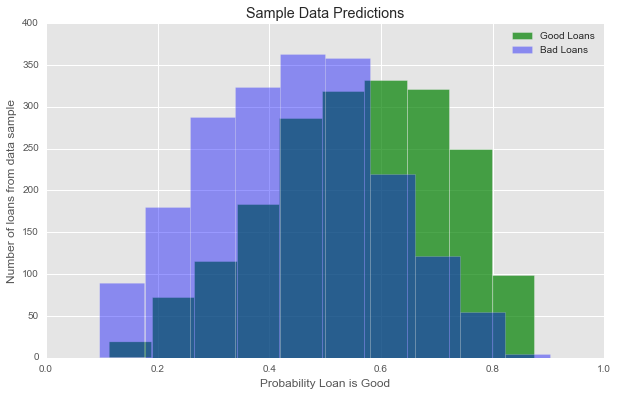

In [35]:
plt.figure(figsize=(10,6))
plt.hist(g, color = 'green', label = 'Good Loans', alpha = 0.7)
plt.hist(b, color = 'blue', label = 'Bad Loans', alpha = 0.4)
plt.xlabel('Probability Loan is Good')
plt.ylabel('Number of loans from data sample')
plt.title('Sample Data Predictions')
plt.legend();

## Checking Model Accuracy, Recall, and Precision

Using the 4,000 data samples used above, calculate the accuracy, recall, and precision of the model. Note: 2,0000 good and 2,000 bad loans used in samples.

This was used to find the point of highest accuracy, which happends to occur where precision and recall intersect - a cutoff for good/bad decision around P = 0.515

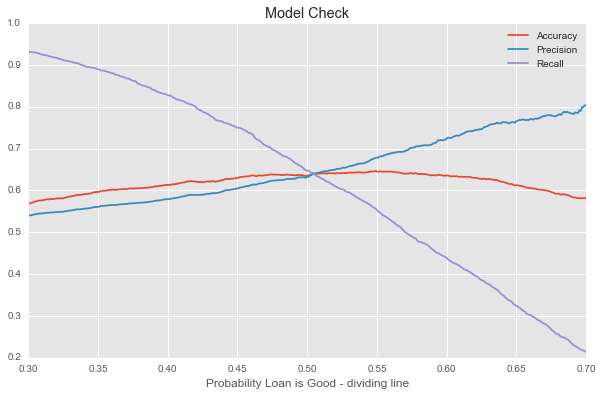

In [36]:
# Find P with highest accuracy

decision_point = np.arange(0.3,0.7001, 0.001)
X = []
a = []
p = []
r = []

for j in decision_point:  
    # For Good Loans
    TP = float(len([1 for i in g if i > j]))
    FN = float(len([1 for i in g if i < j]))

    # For Bad Loans
    TN = float(len([1 for i in b if i < j]))
    FP = float(len([1 for i in b if i > j]))

    Accuracy = ((TP + TN)/(TP + TN + FP + FN))
    Precision = (TP/(TP + FP))
    Recall = TP/(TP+FN)

    X.append(j)
    a.append(Accuracy)
    p.append(Precision)
    r.append(Recall)

plt.figure(figsize=(10,6))
plt.xlabel('Probability Loan is Good - dividing line')
plt.plot(X,a, label = 'Accuracy')
plt.plot(X,p, label = 'Precision')
plt.plot(X,r, label = 'Recall')
plt.legend()
plt.title('Model Check')
plt.xlim(xmin=0.3,xmax=0.7);

# Conclusion

Based on the highest accuracy, while balancing precision and recall, the cutoff point for good vs bad loans should be P = 0.549 (peak accuracy). This will give an accuracy of 64.9% based on the sample set of 4,000 closed loans from 2015.

I believe the accuracy of this model was limited in a couple of inter-related aspects. 
1. The data used to develop the model is the number of closed loans in 2015. This in itself is inherently biased data in that to grant a loan, Lending Club already has a set of metrics in place (one would hope), which would already weed out (fingers crossed) a high percentage of loans that would go bad. 
2. Because a significant set of bad performers have already been removed from the sample pool, you get an oversampling of good performing loans. This can be adjusted for by resampling to match the number of good loans and bad in the data used to fit the model, but it is not a perfect solution.

That said, this model does have a decent accuracy of close to 65%, showing that the criteria that Lending Club already has in place for poor performing loans can be improved.

